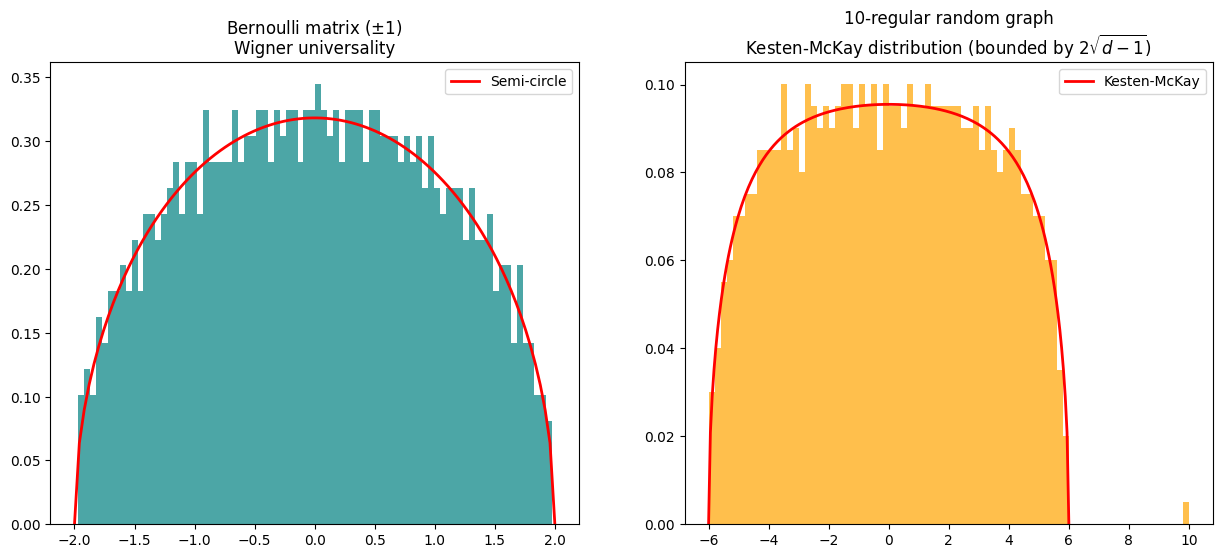

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings

warnings.filterwarnings('ignore')

def simulate_discrete_models(n=1000, d=10):
    # 1. Bernoulli matrix (+1 / -1)
    # must follow the semi circle (universality)
    B = np.random.choice([-1, 1], size=(n, n))
    B = (B + B.T) / np.sqrt(2 * n) # Wigner normalization
    ev_bernoulli = np.linalg.eigvalsh(B)

    # d-regular random graph adjacency matrix
    # (every node has exactly degree d)
    G = nx.random_regular_graph(d, n)
    A = nx.adjacency_matrix(G).toarray()
    ev_adj = np.linalg.eigvalsh(A)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Bernoulli
    ax1.hist(ev_bernoulli, bins=80, density=True, color='teal', alpha=0.7)
    # theoretical semi-circle
    x = np.linspace(-2, 2, 100)
    ax1.plot(x, (1/(2*np.pi)) * np.sqrt(4 - x**2), 'r', lw=2, label="Semi-circle")
    ax1.set_title("Bernoulli matrix ($\pm 1$)\nWigner universality")
    ax1.legend()

    # Kesten-McKay
    ax2.hist(ev_adj, bins=80, density=True, color='orange', alpha=0.7)

    # theoretical Kesten-McKay distribution
    x_km = np.linspace(-2*np.sqrt(d-1), 2*np.sqrt(d-1), 200)
    term1 = d * np.sqrt(4*(d-1) - x_km**2)
    term2 = 2 * np.pi * (d**2 - x_km**2)
    ax2.plot(x_km, term1 / term2, 'r', lw=2, label="Kesten-McKay")
    ax2.set_title(f"{d}-regular random graph\nKesten-McKay distribution (bounded by $2\sqrt{{d-1}}$)")
    ax2.legend()

    plt.show()

simulate_discrete_models()

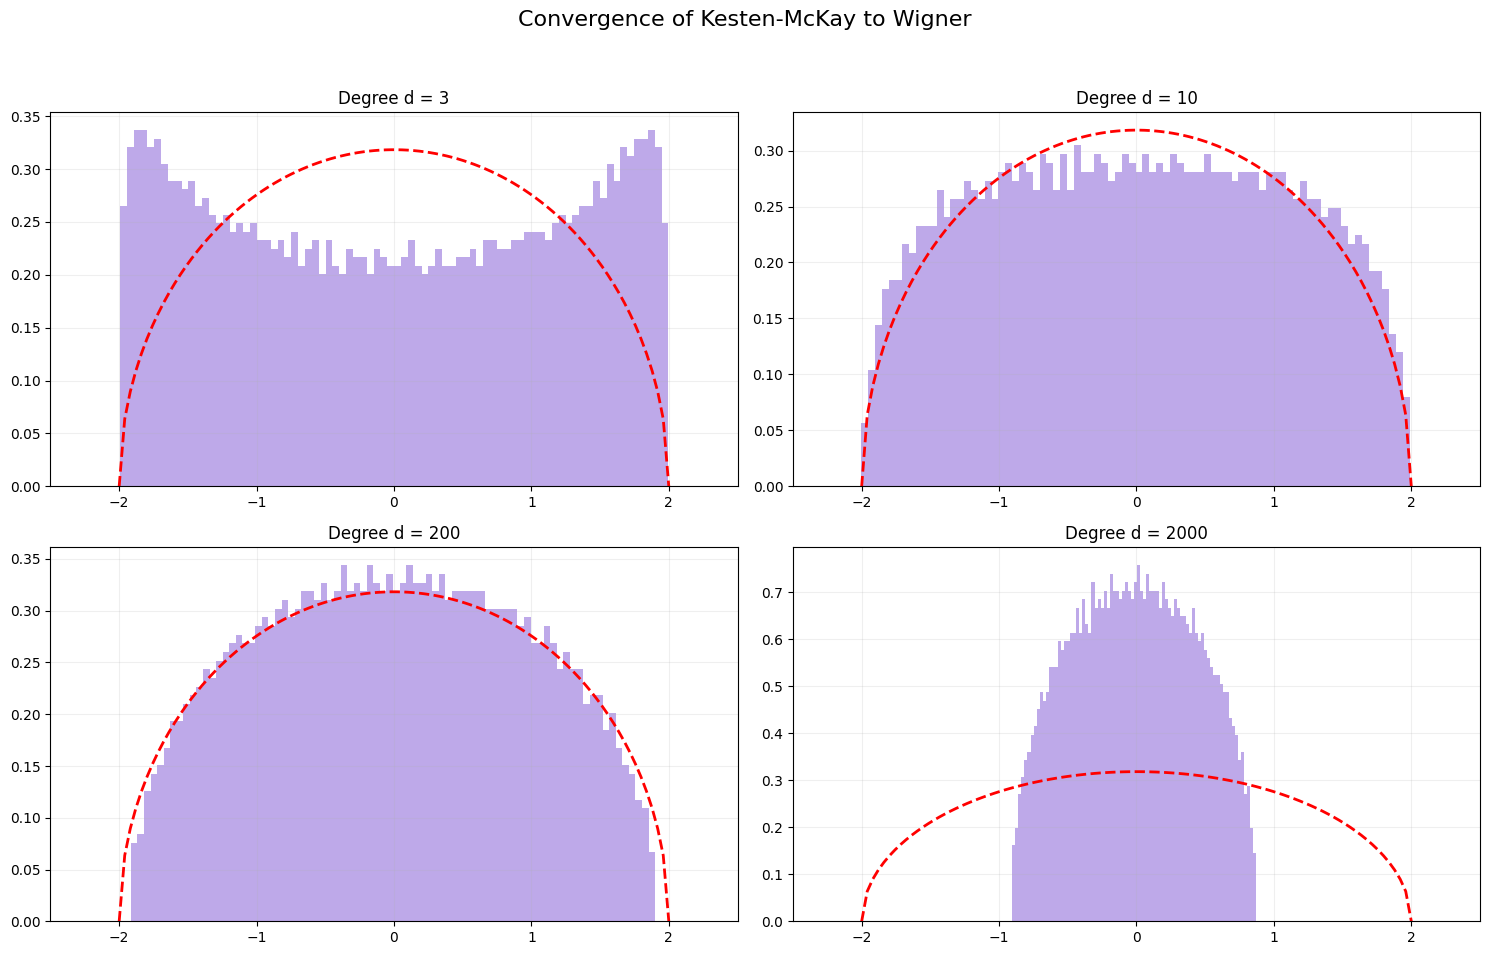

In [ ]:
def plot_km_to_wigner_transition(n=2500, degrees=[3, 10, 200, 2000]):
    plt.figure(figsize=(15, 10))

    for i, d in enumerate(degrees):
        # d-regular graph generation
        G = nx.random_regular_graph(d, n)
        A = nx.adjacency_matrix(G).toarray()

        # normalization by sqrt(d-1) to compare to semi-circle
        # (standard scaling for graphs)
        ev = np.linalg.eigvalsh(A) / np.sqrt(d-1)

        # we take back the outlier eigenvalue
        ev = ev[:-1]

        plt.subplot(2, 2, i+1)
        plt.hist(ev, bins=80, density=True, alpha=0.6, color='mediumpurple')

        # theoretical semi-circle
        x = np.linspace(-2, 2, 100)
        plt.plot(x, (1/(2*np.pi)) * np.sqrt(4 - x**2), 'r--', lw=2)

        plt.title(f"Degree d = {d}")
        plt.xlim(-2.5, 2.5)
        plt.grid(alpha=0.2)

    plt.suptitle("Convergence of Kesten-McKay to Wigner", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_km_to_wigner_transition()

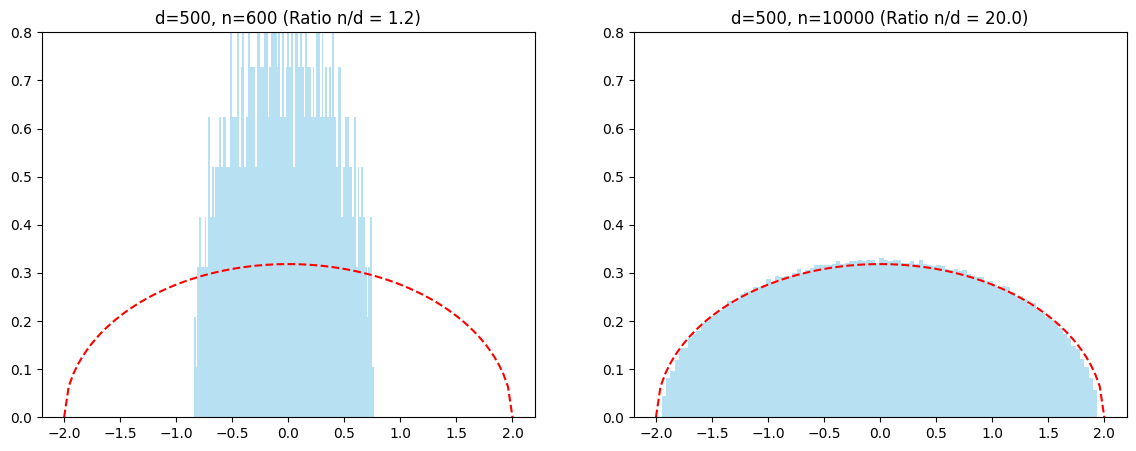

In [ ]:
def plot_saturation_effect():
    d = 500
    # first case: d close to n
    n_small = 600
    # n much larger than (Kesten-McKay regime)
    n_large = 10000

    plt.figure(figsize=(14, 5))

    for i, n in enumerate([n_small, n_large]):
        G = nx.random_regular_graph(d, n)
        A = nx.adjacency_matrix(G).toarray()
        ev = np.linalg.eigvalsh(A) / np.sqrt(d)
        ev = ev[:-1] # outlier removing

        plt.subplot(1, 2, i+1)
        plt.hist(ev, bins=100, density=True, alpha=0.6, color='skyblue')

        # theoretical semi-circle
        x = np.linspace(-2, 2, 100)
        plt.plot(x, (1/(2*np.pi)) * np.sqrt(4 - x**2), 'r--')

        plt.title(f"d={d}, n={n} (Ratio n/d = {n/d:.1f})")
        plt.ylim(0, 0.8)

    plt.show()

plot_saturation_effect()

<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-835786433.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(n_values, lambda_2_means, 'o-', label="$\lambda_2$ (Simulation)")
/tmp/ipython-input-835786433.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.axhline(theoretical_limit, color='red', linestyle='--', label="Alon-Boppana bound $2\sqrt{d-1}$")
/tmp/ipython-input-835786433.py:21: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\lambda_2$")
/tmp/ipython-input-835786433.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Convergence of $\lambda_2$ to the Alon-Boppana bo

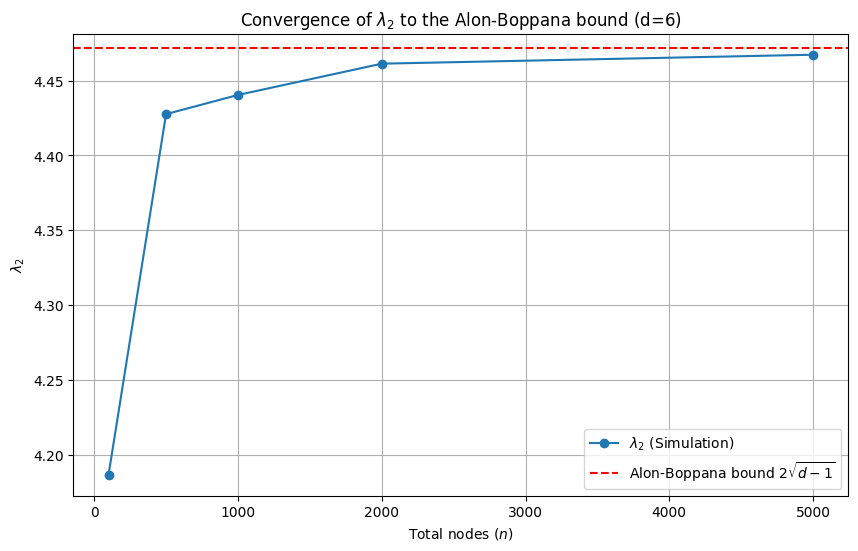

In [ ]:
def study_spectral_gap(d=6, n_values=[100, 500, 1000, 2000, 5000]):
    lambda_2_means = []
    theoretical_limit = 2 * np.sqrt(d - 1)

    for n in n_values:
        gaps = []
        for _ in range(5): # mean over 5 iterations to smooth results
            G = nx.random_regular_graph(d, n)
            A = nx.adjacency_matrix(G).toarray()
            # two largest eigenvalues
            # (Note: eigvalsh returns in increasing ordrer)
            ev = np.linalg.eigvalsh(A)
            gaps.append(ev[-2]) # lambda_2
        lambda_2_means.append(np.mean(gaps))

    plt.figure(figsize=(10, 6))
    plt.plot(n_values, lambda_2_means, 'o-', label="$\lambda_2$ (Simulation)")
    plt.axhline(theoretical_limit, color='red', linestyle='--', label="Alon-Boppana bound $2\sqrt{d-1}$")

    plt.xlabel("Total nodes ($n$)")
    plt.ylabel("$\lambda_2$")
    plt.title(f"Convergence of $\lambda_2$ to the Alon-Boppana bound (d={d})")
    plt.legend()
    plt.grid(True)
    plt.show()

study_spectral_gap()